# 2DI70 Statistical Learning Theory 
## Assignment 1

### Group x
Name1 ID1

Name2 ID2

Name3 ID3

In [96]:
# Imports here
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import numpy as np
import operator


#### Load MNIST data from csv files

In [97]:
train_small = pd.read_csv("MNIST_train_small.csv").values
test_small  = pd.read_csv("MNIST_test_small.csv").values

In [98]:
## Normalizing the data is probably not necessary for this specific dataset
X_train_s = train_small[:, 1:]/255.0
y_train_s = train_small[:,0]

X_test_s = test_small[:, 1:]/255.0
y_test_s = test_small[:,0]

#### Define functions

In [99]:
## Render chosen data point as image
def show_img(data, index):
    plt.imshow(data[index].reshape(28,28), cmap = "Greys")
    plt.show()

In [100]:
## Compute the nth root of given value
def n_root(val, p):   
    return val**(1 / float(p))
  
## Compute Minkowski distance for two given vectors
## Use p = 2 for Euclidian distance
def minkowski_dist(x1, x2, p):    
    p_sum = sum(pow(abs(a-b), p) for a, b in zip(x1, x2))
    return n_root(p_sum, p) 
  
v1 = X_train_s[0]
v2 = X_train_s[1]
print(minkowski_dist(v1, v2, 2)) 

8.617445178210408


In [101]:
## Compute p-minkowski distance from point to every datapoint in collection
## The list of labels should share length and indices with collection
def compute_dists(point, collection, labels, p):
    vals = []
    for i in range(len(collection)):
        d = minkowski_dist(point, collection[i], p)
        vals.append([i, d, labels[i]])
    
    return vals

#### Do KNN magic

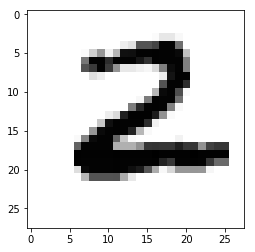

In [102]:
## Compute knn for example data
show_img(X_test_s, 0)
dists1 = compute_dists(X_test_s[0], X_train_s, y_train_s, 2)

In [103]:
## Since the point we selected is in the training set, it shows up in the list with a distance of 0
## In this case, we can confidently say it is a 3
dists1_sorted = sorted(dists1, key = lambda x: float(x[1]))
dists1_sorted[0:20]

[[1135, 5.3865168364513, 2],
 [2930, 6.176237779614883, 2],
 [1839, 6.359115856708896, 2],
 [2931, 6.971545396350763, 2],
 [1673, 7.1679066012479415, 2],
 [1745, 7.241429992960301, 2],
 [674, 7.360805206442928, 2],
 [1959, 7.46974314606631, 2],
 [2869, 7.472301795139638, 2],
 [1058, 7.590140106469208, 2],
 [394, 7.816389685297066, 2],
 [20, 7.866137843152389, 2],
 [535, 7.8670723020162905, 2],
 [1936, 7.948569785196725, 2],
 [1146, 7.982502009483685, 2],
 [402, 8.022200070046882, 2],
 [2694, 8.041375128432373, 2],
 [1943, 8.087366085202186, 2],
 [629, 8.16194129232512, 2],
 [2707, 8.167651236462792, 2]]

In [104]:
 for i in range (3): # range(len(X_test_s)):
    dists1 = compute_dists(X_test_s[i], X_train_s, y_train_s, 2)
    dists1_sorted = sorted(dists1, key = lambda x: float(x[1]))
    list = dists1_sorted[0:20] #get top 20 nearest neighbors 
      
    ## here we get the label of closest neighbors
    print (list)
    labels = {}
    current_sum_labels = 0;
    for j in range(len(list)):
        labels = (list[j][-1]) 
        print(labels)
        current_sum_labels = current_sum_labels + labels
    pred = 0 
    pred = current_sum_labels/len(list)
    print ("predicted label is:" + str(pred))
    print ("actual label is: " + str(y_test_s[i]))

    
    
    
    
    
   
    

[[1135, 5.3865168364513, 2], [2930, 6.176237779614883, 2], [1839, 6.359115856708896, 2], [2931, 6.971545396350763, 2], [1673, 7.1679066012479415, 2], [1745, 7.241429992960301, 2], [674, 7.360805206442928, 2], [1959, 7.46974314606631, 2], [2869, 7.472301795139638, 2], [1058, 7.590140106469208, 2], [394, 7.816389685297066, 2], [20, 7.866137843152389, 2], [535, 7.8670723020162905, 2], [1936, 7.948569785196725, 2], [1146, 7.982502009483685, 2], [402, 8.022200070046882, 2], [2694, 8.041375128432373, 2], [1943, 8.087366085202186, 2], [629, 8.16194129232512, 2], [2707, 8.167651236462792, 2]]
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
predicted label is:2.0
actual label is: 2
[[666, 2.247698639363126, 1], [1556, 2.5222881905648644, 1], [2272, 2.9979924078470668, 1], [2205, 3.3107725559662793, 1], [207, 3.412974768508096, 1], [460, 3.58639618571662, 1], [1410, 3.604725848508672, 1], [292, 3.7451575808838355, 1], [2018, 4.11309178468212, 1], [1284, 4.1317201152923095, 1], [2376, 4.18657343837898, 1

In [113]:
#for each x in test set, compute the distance with all x in training set, then sort in distance for top 20 nearest neighbors
for i in range (20): # range(len(X_test_s)):
    dists = compute_dists(X_test_s[i], X_train_s, y_train_s, 2)
    dists_sorted = sorted(dists, key = lambda x: float(x[1]))
    list = dists_sorted[0:20] #get list top 20 nearest neighbors with its [index,distance,label] 
     
#count frequency of labels of the top 20 nearest neighbors
    pred_class = {}
    for j in range(20):
        labels = list[j][-1]
        if labels in pred_class:
            pred_class[labels] += 1
        else:
            pred_class[labels] = 1
#sort the most frequency labels at the beginning, return the prediction as the most frequency label at first position
    sortedVotes = sorted(pred_class.items(), key=operator.itemgetter(1), reverse=True)
    print("Predicted class is: " + str(sortedVotes[0][0]))
    print ("Actual class is: " + str(y_test_s[i]))
    error = 0
    if sortedVotes[0][0] != y_test_s[i]:
        error = error + 1
    print("Total error is: " + str(error/20))

    


Predicted class is: 2
Actual class is: 2
Total error is: 0.0
Predicted class is: 1
Actual class is: 1
Total error is: 0.0
Predicted class is: 3
Actual class is: 3
Total error is: 0.0
Predicted class is: 9
Actual class is: 9
Total error is: 0.0
Predicted class is: 1
Actual class is: 1
Total error is: 0.0
Predicted class is: 4
Actual class is: 4
Total error is: 0.0
Predicted class is: 2
Actual class is: 2
Total error is: 0.0
Predicted class is: 6
Actual class is: 6
Total error is: 0.0
Predicted class is: 3
Actual class is: 3
Total error is: 0.0
Predicted class is: 7
Actual class is: 7
Total error is: 0.0
Predicted class is: 4
Actual class is: 4
Total error is: 0.0
Predicted class is: 9
Actual class is: 9
Total error is: 0.0
Predicted class is: 0
Actual class is: 0
Total error is: 0.0
Predicted class is: 6
Actual class is: 6
Total error is: 0.0
Predicted class is: 7
Actual class is: 7
Total error is: 0.0
Predicted class is: 6
Actual class is: 6
Total error is: 0.0
Predicted class is: 7
Ac